In [175]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

import statsmodels.api as sm
from statsmodels.formula.api import ols


from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [2]:
boxoffice_df = pd.read_csv('boxoffice.csv',index_col= 0)
boxoffice_df.head()

,imdbID,Title,Domestic Gross,Opening Weekend,Domestic Multiplier,Rotten Tomatoes Score,Metascore,imdbRating,imdbVotes,Year,Month,budget,popularity,vote_average,vote_count
0,tt0114709,Toy Story,191796233.0,29140617.0,6.581749,100.0,95.0,8.3,820774.0,1995,10.0,30000000.0,21.946943,7.7,5415.0
1,tt0113497,Jumanji,100475249.0,11084370.0,9.064588,54.0,39.0,7.0,276338.0,1995,12.0,65000000.0,17.015539,6.9,2413.0
2,tt0113228,Grumpier Old Men,71518503.0,7797185.0,9.172349,17.0,46.0,6.7,22673.0,1995,12.0,NaN,11.712900,6.5,92.0
3,tt0114885,Waiting to Exhale,67052156.0,14126927.0,4.746408,56.0,NaN,5.9,8898.0,1995,12.0,16000000.0,3.859495,6.1,34.0
4,tt0113041,Father of the Bride Part II,76594107.0,11134978.0,6.878694,48.0,49.0,6.0,31909.0,1995,2.0,NaN,8.387519,5.7,173.0


In [3]:
boxoffice_df.shape

(12047, 15)

In [4]:
boxoffice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12047 entries, 0 to 45373
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdbID                 10793 non-null  object 
 1   Title                  12047 non-null  object 
 2   Domestic Gross         12047 non-null  float64
 3   Opening Weekend        11022 non-null  float64
 4   Domestic Multiplier    11022 non-null  float64
 5   Rotten Tomatoes Score  11248 non-null  float64
 6   Metascore              8974 non-null   float64
 7   imdbRating             12046 non-null  float64
 8   imdbVotes              12045 non-null  float64
 9   Year                   12047 non-null  int64  
 10  Month                  12034 non-null  float64
 11  budget                 4280 non-null   float64
 12  popularity             12046 non-null  float64
 13  vote_average           11884 non-null  float64
 14  vote_count             11884 non-null  float64
dtypes:

In [5]:
boxoffice_df.describe()

,Domestic Gross,Opening Weekend,Domestic Multiplier,Rotten Tomatoes Score,Metascore,imdbRating,imdbVotes,Year,Month,budget,popularity,vote_average,vote_count
count,1.204700e+04,1.102200e+04,11022.000000,11248.000000,8974.000000,12046.000000,1.204500e+04,12047.000000,12034.000000,4.280000e+03,12046.000000,11884.000000,11884.000000
mean,2.155059e+07,5.629878e+06,22.756284,59.125445,57.346891,6.451337,5.058787e+04,2000.622479,6.608526,2.827971e+07,4.873856,5.834239,187.550067
std,4.719193e+07,1.376996e+07,118.109832,27.648677,17.593263,0.984722,1.224700e+05,11.992828,3.543215,3.570818e+07,6.350835,1.628050,630.690179
min,3.000000e+01,2.000000e+01,0.480129,0.000000,1.000000,1.500000,1.700000e+01,1921.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000
25%,1.394235e+05,1.714725e+04,2.548041,37.000000,45.000000,5.900000,2.523000e+03,1993.500000,3.000000,5.000000e+06,0.874663,5.300000,6.000000
50%,2.479538e+06,1.940740e+05,3.960321,64.000000,59.000000,6.500000,9.456000e+03,2003.000000,7.000000,1.600000e+07,2.936555,6.100000,19.000000
75%,2.180542e+07,5.520745e+06,11.084361,83.000000,71.000000,7.200000,4.182100e+04,2010.000000,10.000000,3.700000e+07,7.614143,6.800000,94.000000
max,9.366622e+08,2.479667e+08,5757.944732,100.000000,100.000000,9.300000,2.154564e+06,2017.000000,12.000000,3.800000e+08,187.860492,10.000000,12114.000000


In [6]:
boxoffice_df.isnull().any()

imdbID                    True
Title                    False
Domestic Gross           False
Opening Weekend           True
Domestic Multiplier       True
Rotten Tomatoes Score     True
Metascore                 True
imdbRating                True
imdbVotes                 True
Year                     False
Month                     True
budget                    True
popularity                True
vote_average              True
vote_count                True
dtype: bool

In [7]:
bodf = boxoffice_df.drop(columns=['imdbID','Title','budget'])

In [8]:
bodf.head()

,Domestic Gross,Opening Weekend,Domestic Multiplier,Rotten Tomatoes Score,Metascore,imdbRating,imdbVotes,Year,Month,popularity,vote_average,vote_count
0,191796233.0,29140617.0,6.581749,100.0,95.0,8.3,820774.0,1995,10.0,21.946943,7.7,5415.0
1,100475249.0,11084370.0,9.064588,54.0,39.0,7.0,276338.0,1995,12.0,17.015539,6.9,2413.0
2,71518503.0,7797185.0,9.172349,17.0,46.0,6.7,22673.0,1995,12.0,11.712900,6.5,92.0
3,67052156.0,14126927.0,4.746408,56.0,NaN,5.9,8898.0,1995,12.0,3.859495,6.1,34.0
4,76594107.0,11134978.0,6.878694,48.0,49.0,6.0,31909.0,1995,2.0,8.387519,5.7,173.0


In [9]:
bodf.fillna(bodf.mean(),inplace= True)

In [10]:
bodf.isnull().any()

Domestic Gross           False
Opening Weekend          False
Domestic Multiplier      False
Rotten Tomatoes Score    False
Metascore                False
imdbRating               False
imdbVotes                False
Year                     False
Month                    False
popularity               False
vote_average             False
vote_count               False
dtype: bool

In [11]:
y = bodf['Domestic Gross'].values
df = bodf
df = df.drop(columns=['Domestic Gross'])
X = df.values

In [12]:
model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              6731.
Date:                Mon, 23 Mar 2020   Prob (F-statistic):                        0.00
Time:                        02:23:59   Log-Likelihood:                     -2.1925e+05
No. Observations:               12047   AIC:                                  4.385e+05
Df Residuals:                   12036   BIC:                                  4.386e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7078      0.017    159.098      0.000       2.674       2.741
x2          3.169e+04   1589.939     19.929      0.000    2.86e+04    3.48e+04
x3          3708.1944   1.22e+04      0.304      0.761   -2.02e+04    2.76e+04
x4          9.458e+04   1.91e+04      4.959      0.000    5.72e+04    1.32e+05
x5         -1.061e+05   2.66e+05     -0.399      0.690   -6.27e+05    4.15e+05
x6            79.3672      2.135     37.180      0.000      75.183      83.552
x7         -4669.7596    771.016     -6.057      0.000   -6181.074   -3158.445
x8          3.202e+05   5.02e+04      6.384      0.000    2.22e+05    4.19e+05
x9          1.462e+05   3.02e+04      4.843      0.000     8.7e+04    2.05e+05
x10         3.791e+05   1.13e+05      3.347      0.001    1.57e+05    6.01e+05
x11         4801.7017    335.311     14.320      0.000    4144.438    5458.966
==============================================================================
Omnibus:                    12084.669   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2661736.127
Skew:                           4.436   Prob(JB):                         0.00
Kurtosis:                      75.277   Cond. No.                     2.16e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [14]:
reg = LinearRegression(normalize=True)  
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [15]:
reg.coef_

array([ 2.73017967e+00,  3.62238487e+04,  1.12725667e+04,  9.22521702e+04,
       -4.93075295e+05,  8.09528202e+01, -1.92597206e+05,  2.25666986e+05,
        2.04706534e+05,  1.38864949e+05,  3.62858252e+03])

In [16]:
y_pred1 = reg.predict(X_test)

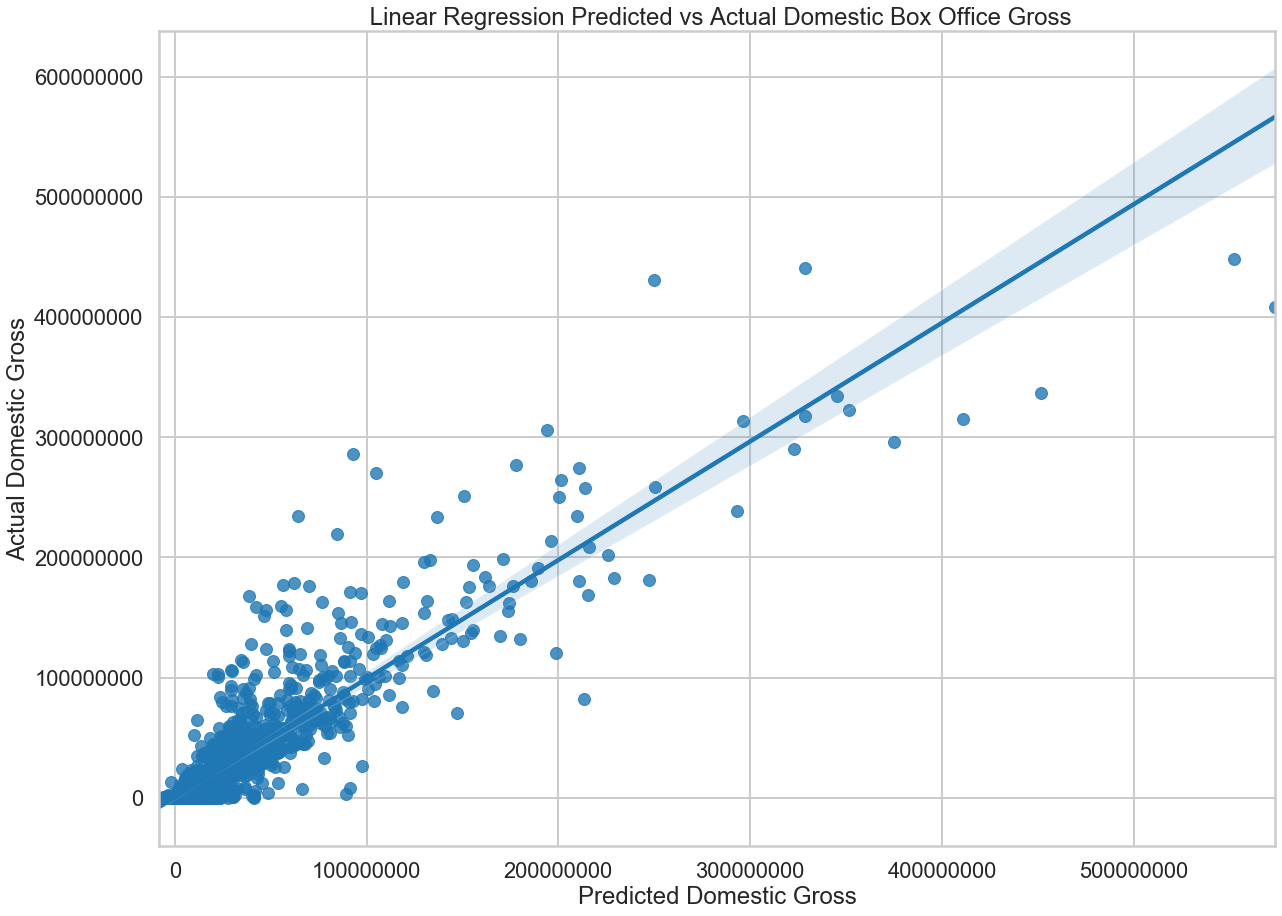

In [17]:
plt.figure(figsize=(20,15))
sns.regplot(y_pred1,y_test, fit_reg= True)
_ = plt.xlabel('Predicted Domestic Gross')
_ = plt.ylabel("Actual Domestic Gross")
_ = plt.title(" Linear Regression Predicted vs Actual Domestic Box Office Gross")
_ = plt.ticklabel_format(useOffset= False,style= 'plain')

In [19]:
r_square = reg.score(X_test, y_test)
n = len(bodf['Domestic Gross'])
k = 11
f_value = (r_square / (1 - r_square)) * ((n - k - 1) / k)
cv_scores = cross_val_score(reg,X_test,y_test,cv=5)
print('R^2 Training Data: {}'.format(round(reg.score(X_train, y_train),4)))
print('R^2 Testing Data: {}'.format(round(r_square,4)))
print('F-statistic = {}'.format(round(f_value),2))
print('Mean Test Value: {}'.format(round(y_test.mean(),2)))
print('Mean Absolute Error: {}'.format(round(metrics.mean_absolute_error(y_test, y_pred1),2)))   
print('Root Mean Squared Error: {}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred1)),2)))
print('Average 5-Fold CV Score: {}'.format(round(np.mean(cv_scores),4)))

R^2 Training Data: 0.8355
R^2 Testing Data: 0.8217
F-statistic = 5041.0
Mean Test Value: 21084331.89
Mean Absolute Error: 8894097.79
Root Mean Squared Error: 18988244.38
Average 5-Fold CV Score: 0.8213


In [18]:
rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [19]:
y_pred2 = rf.predict(X_test)

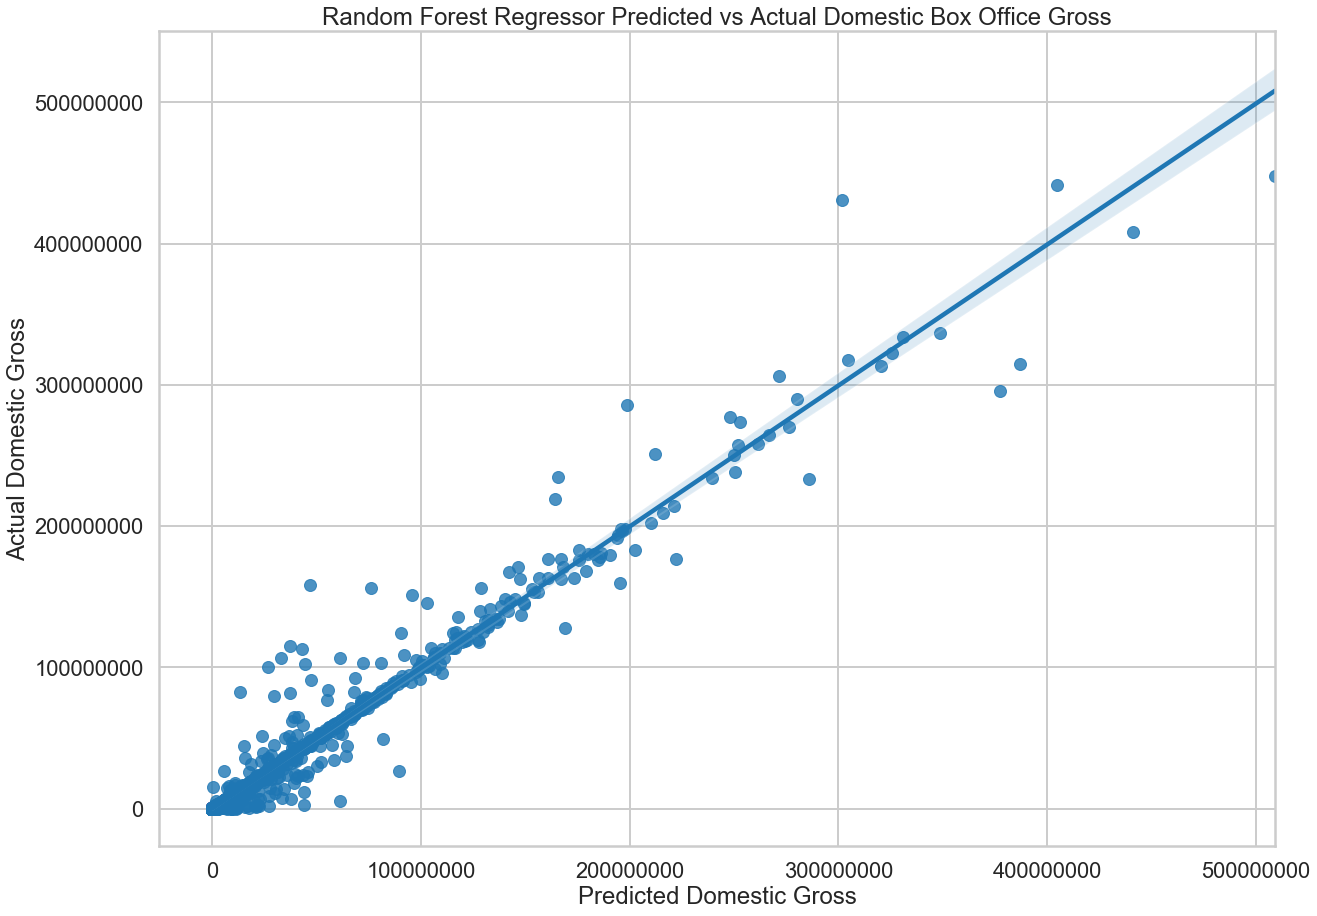

In [20]:
plt.figure(figsize=(20,15))
sns.regplot(y_pred2,y_test, fit_reg= True)
_ = plt.xlabel('Predicted Domestic Gross')
_ = plt.ylabel("Actual Domestic Gross")
_ = plt.title("Random Forest Regressor Predicted vs Actual Domestic Box Office Gross")
_ = plt.ticklabel_format(useOffset= False,style= 'plain')

In [22]:
r_square = rf.score(X_test, y_test)
n = len(bodf['Domestic Gross'])
k = 11
f_value = (r_square / (1 - r_square)) * ((n - k - 1) / k)
cv_scores = cross_val_score(rf,X_test,y_test,cv=5)
print('R^2 Training Data: {}'.format(round(rf.score(X_train, y_train),4)))
print('R^2 Testing Data: {}'.format(round(r_square,4)))
print('F-statistic = {}'.format(round(f_value),2))
print('Mean Test Value: {}'.format(round(y_test.mean(),2)))
print('Mean Absolute Error: {}'.format(round(metrics.mean_absolute_error(y_test, y_pred2),2)))   
print('Root Mean Squared Error: {}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred2)),2)))
print('Average 5-Fold CV Score: {}'.format(round(np.mean(cv_scores),4)))

R^2 Training Data: 0.9931
R^2 Testing Data: 0.9654
F-statistic = 30492.0
Mean Test Value: 21084331.89
Mean Absolute Error: 2015514.35
Root Mean Squared Error: 8368634.07
Average 5-Fold CV Score: 0.9271


In [23]:
gbr = GradientBoostingRegressor(n_estimators=1000)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
y_pred3 = gbr.predict(X_test)

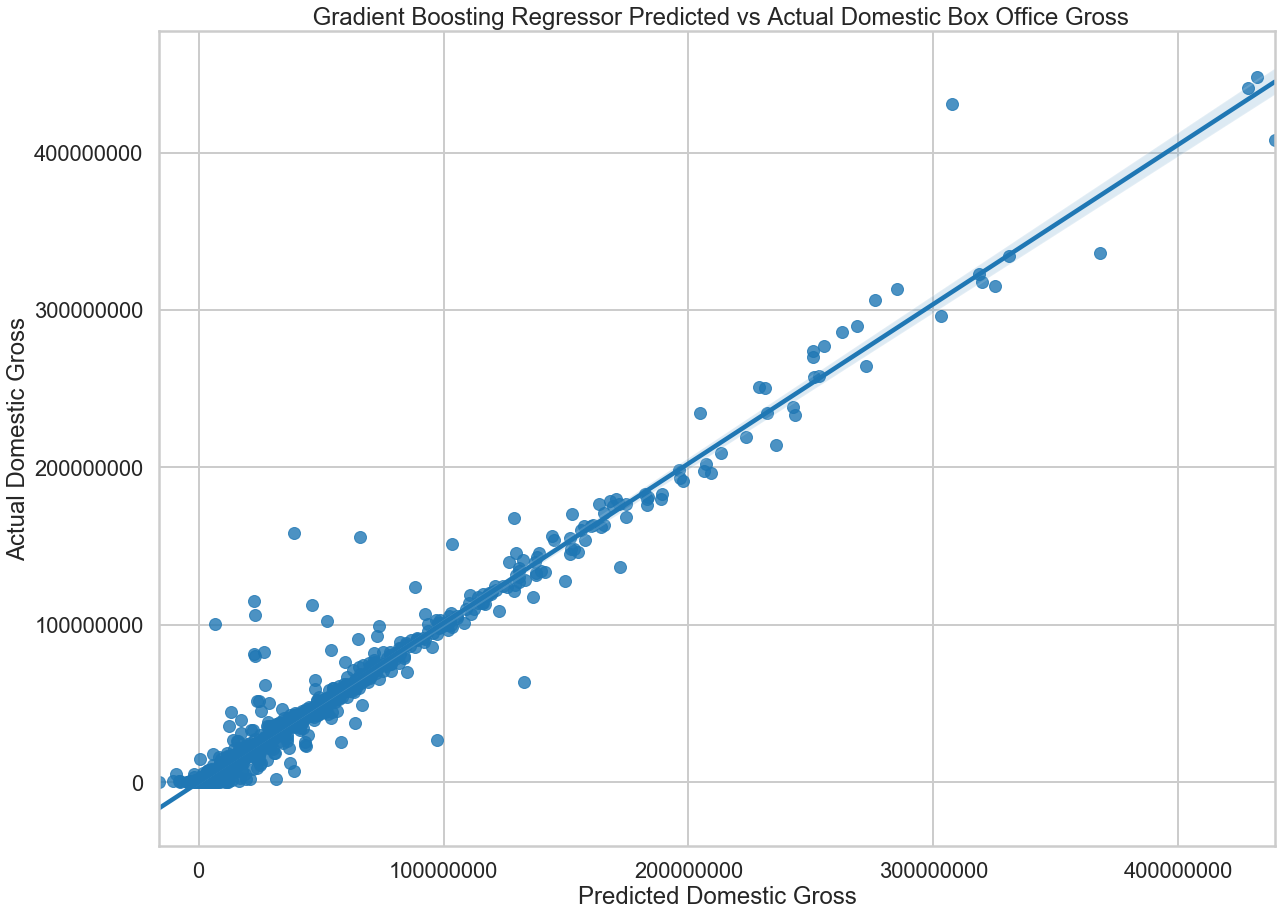

In [25]:
plt.figure(figsize=(20,15))
sns.regplot(y_pred3,y_test, fit_reg= True)
_ = plt.xlabel('Predicted Domestic Gross')
_ = plt.ylabel("Actual Domestic Gross")
_ = plt.title(" Gradient Boosting Regressor Predicted vs Actual Domestic Box Office Gross")
_ = plt.ticklabel_format(useOffset= False,style= 'plain')

In [26]:
r_square = gbr.score(X_test, y_test)
n = len(bodf['Domestic Gross'])
k = 11
f_value = (r_square / (1 - r_square)) * ((n - k - 1) / k)
cv_scores = cross_val_score(gbr,X_test,y_test,cv=5)
print('R^2 Training Data: {}'.format(round(gbr.score(X_train, y_train),4)))
print('R^2 Testing Data: {}'.format(round(r_square,4)))
print('F-statistic = {}'.format(round(f_value),2))
print('Mean Test Value: {}'.format(round(y_test.mean(),2)))
print('Mean Absolute Error: {}'.format(round(metrics.mean_absolute_error(y_test, y_pred3),2)))   
print('Root Mean Squared Error: {}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred3)),2)))
print('Average 5-Fold CV Score: {}'.format(round(np.mean(cv_scores),4)))

R^2 Training Data: 0.9972
R^2 Testing Data: 0.9716
F-statistic = 37386.0
Mean Test Value: 21084331.89
Mean Absolute Error: 2399772.25
Root Mean Squared Error: 7581985.61
Average 5-Fold CV Score: 0.9418


In [27]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [28]:
n_estimators = [100,200,300,400,500,600,700,800,900,1000,1250,1500,1750,2000, 2500, 3000]
max_features = ['auto', 'sqrt']
max_depth = [10,20,30,40,50,60,70,80,90, 100,110,120,130,140,150]
max_depth.append(None)
min_samples_split = [2, 4, 10, 20]
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [29]:

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=13, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.5min
/Users/sayantanchattopadhyay/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 38.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000,
                             

In [30]:

rf_random.best_params_

{'n_estimators': 3000,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [37]:
rf1 = RandomForestRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=2,
                            max_features='auto',max_depth=60,bootstrap=True)
rf1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
y_pred4 = rf1.predict(X_test)

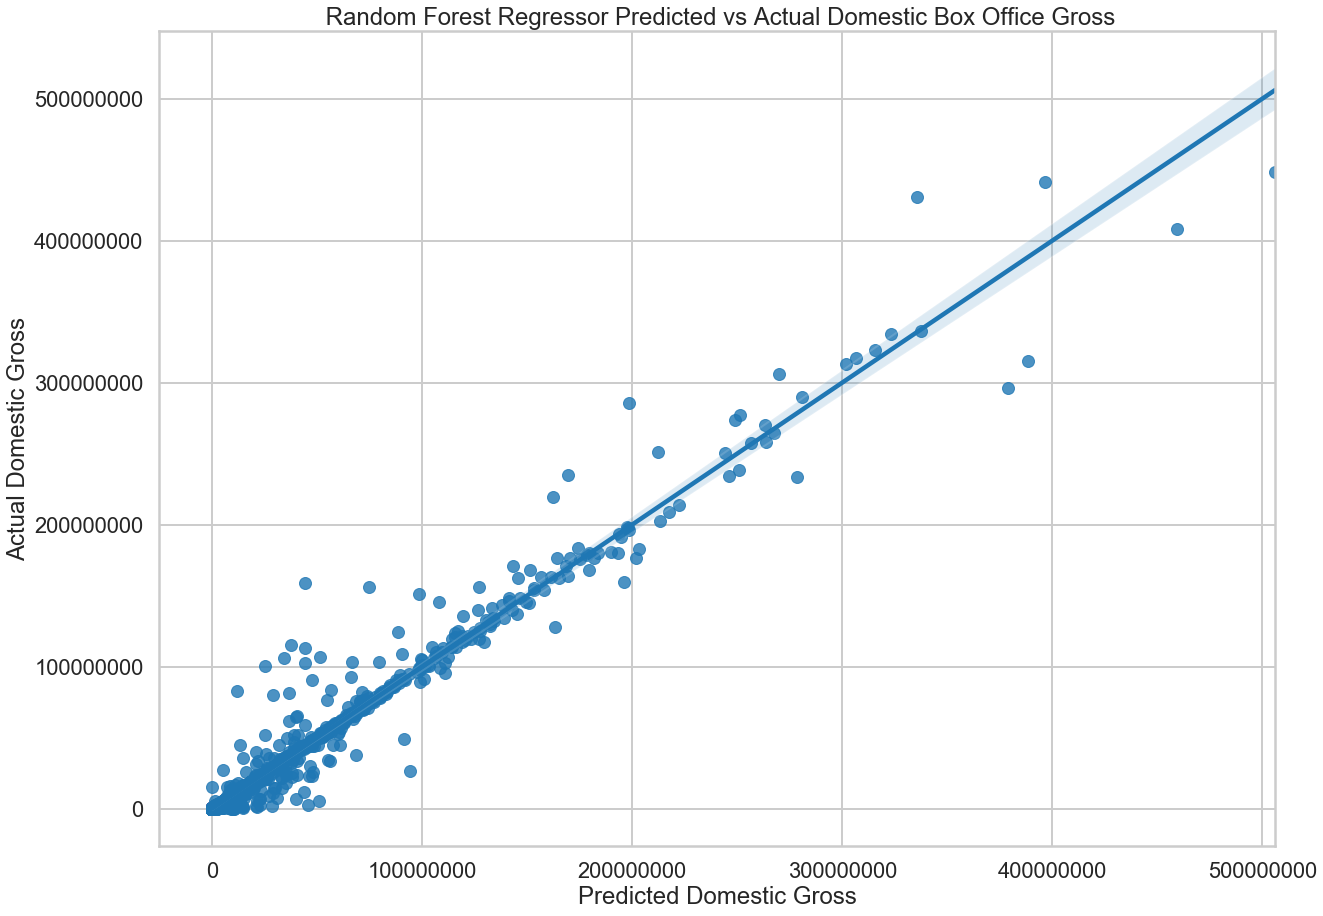

In [39]:
plt.figure(figsize=(20,15))
sns.regplot(y_pred4,y_test, fit_reg= True)
_ = plt.xlabel('Predicted Domestic Gross')
_ = plt.ylabel("Actual Domestic Gross")
_ = plt.title(" Random Forest Regressor Predicted vs Actual Domestic Box Office Gross")
_ = plt.ticklabel_format(useOffset= False,style= 'plain')

In [40]:
r_square = rf1.score(X_test, y_test)
n = len(bodf['Domestic Gross'])
k = 11
f_value = (r_square / (1 - r_square)) * ((n - k - 1) / k)
cv_scores = cross_val_score(rf1,X_test,y_test,cv=5)
print('R^2 Training Data: {}'.format(round(rf1.score(X_train, y_train),4)))
print('R^2 Testing Data: {}'.format(round(r_square,4)))
print('F-statistic = {}'.format(round(f_value),2))
print('Mean Test Value: {}'.format(round(y_test.mean(),2)))
print('Mean Absolute Error: {}'.format(round(metrics.mean_absolute_error(y_test, y_pred4),2)))   
print('Root Mean Squared Error: {}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred4)),2)))
print('Average 5-Fold CV Score: {}'.format(round(np.mean(cv_scores),4)))

R^2 Training Data: 0.985
R^2 Testing Data: 0.9665
F-statistic = 31576.0
Mean Test Value: 21084331.89
Mean Absolute Error: 2010960.67
Root Mean Squared Error: 8228595.23
Average 5-Fold CV Score: 0.929


In [41]:
param_grid = {
    'n_estimators': [100, 200, 300, 500, 700, 1000, 2000, 3000],
    'max_depth': [10, 50, 60, 70, 100],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8],
    'bootstrap': [True]
}
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [42]:

grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 1050 candidates, totalling 3150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
/Users/sayantanchattopadhyay/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 54.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 481.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 541.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 605.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 707.3min
[Parallel(n_jobs=-1)]: Done 3150 out of 3150 | elapsed: 785.7min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [47]:
rf2 = RandomForestRegressor(n_estimators=700,min_samples_split=2,min_samples_leaf=2,
                            max_features='auto',max_depth=70,bootstrap=True)
rf2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=70, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
y_pred5 = rf2.predict(X_test)

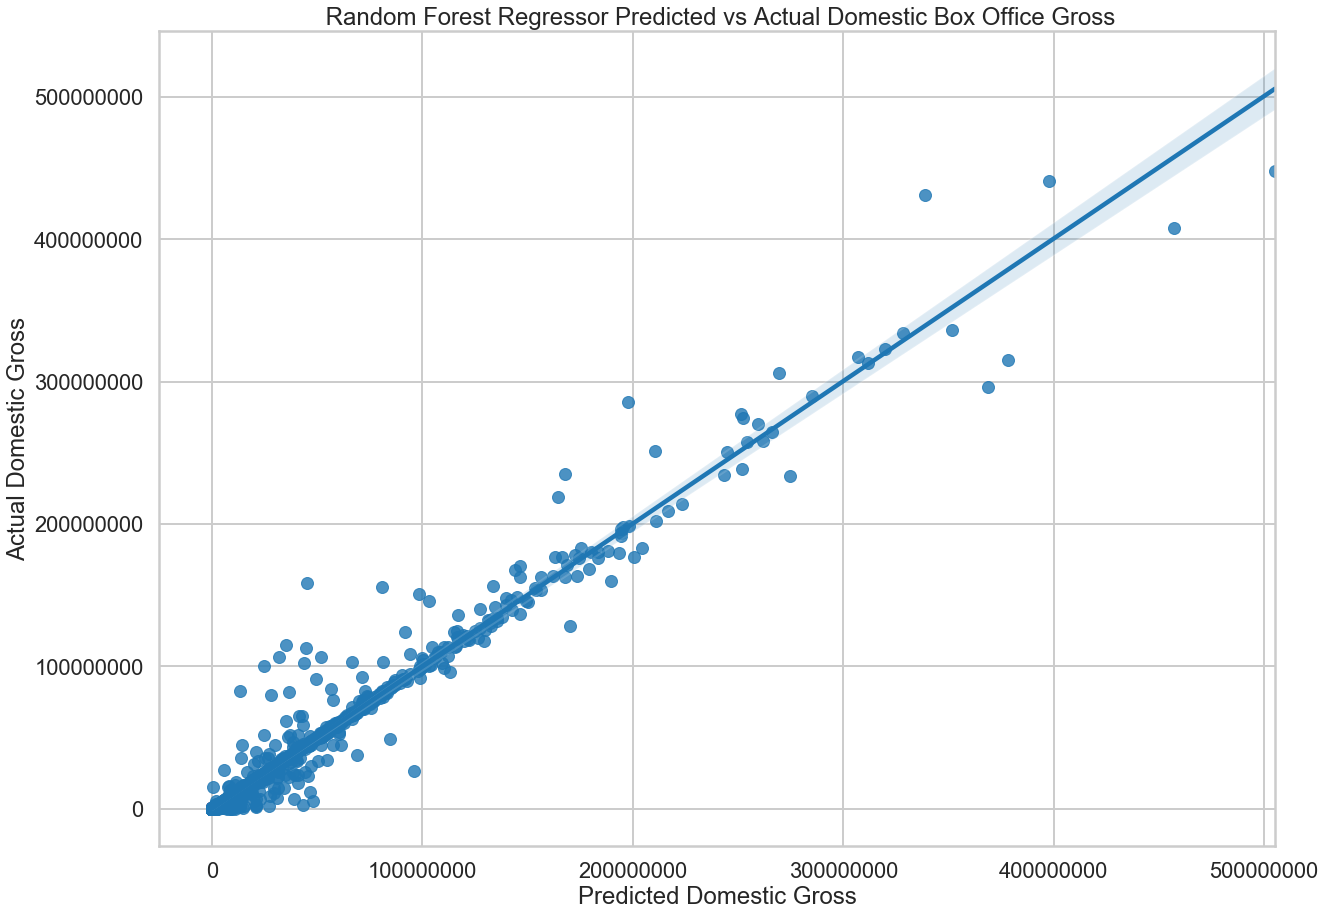

In [49]:
plt.figure(figsize=(20,15))
sns.regplot(y_pred5,y_test, fit_reg= True)
_ = plt.xlabel('Predicted Domestic Gross')
_ = plt.ylabel("Actual Domestic Gross")
_ = plt.title(" Random Forest Regressor Predicted vs Actual Domestic Box Office Gross")
_ = plt.ticklabel_format(useOffset= False,style= 'plain')

In [51]:
r_square = rf2.score(X_test, y_test)
n = len(bodf['Domestic Gross'])
k = 11
f_value = (r_square / (1 - r_square)) * ((n - k - 1) / k)
cv_scores = cross_val_score(rf2,X_test,y_test,cv=5)
print('R^2 Training Data: {}'.format(round(rf2.score(X_train, y_train),4)))
print('R^2 Testing Data: {}'.format(round(r_square,4)))
print('F-statistic = {}'.format(round(f_value),2))
print('Mean Test Value: {}'.format(round(y_test.mean(),2)))
print('Mean Absolute Error: {}'.format(round(metrics.mean_absolute_error(y_test, y_pred5),2)))   
print('Root Mean Squared Error: {}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred5)),2)))
print('Average 5-Fold CV Score: {}'.format(round(np.mean(cv_scores),4)))

R^2 Training Data: 0.9855
R^2 Testing Data: 0.9679
F-statistic = 33007.0
Mean Test Value: 21084331.89
Mean Absolute Error: 1961447.23
Root Mean Squared Error: 8054114.39
Average 5-Fold CV Score: 0.9294


In [52]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [87]:
learning_rate = [0.5,0.2,  0.1, 0.05, 0.01, 0.005, 0.001]
n_estimators = [100, 200, 300, 400, 500, 1000, 2000, 3000]
max_features = ['auto']
max_depth = [2, 3, 4, 5, 7, 10, 20, 30, 40, 50, 100]
max_depth.append(None)
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 3, 4, 5, 10]
random_grid = {'learning_rate': learning_rate,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [88]:

gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=13, n_jobs = -1)
gbr_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
/Users/sayantanchattopadhyay/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 46.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [89]:

gbr_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 4,
 'learning_rate': 0.05}

In [168]:
gbr1 = GradientBoostingRegressor(n_estimators=1000,min_samples_split=10,min_samples_leaf=1,
                            max_features='auto',max_depth=5,learning_rate= 0.05)
gbr1.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=5,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [169]:
y_pred6 = gbr1.predict(X_test)

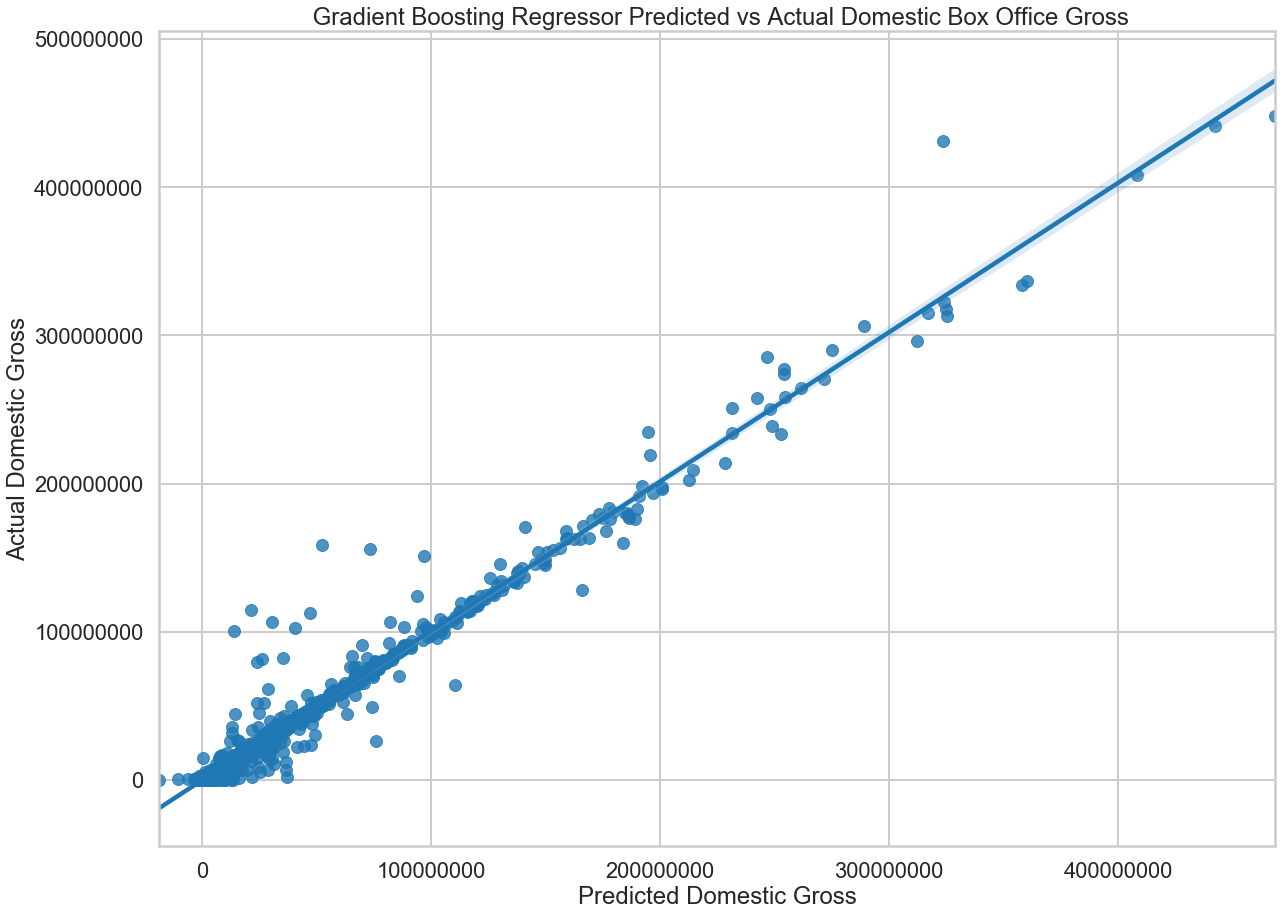

In [170]:
plt.figure(figsize=(20,15))
sns.regplot(y_pred6,y_test, fit_reg= True)
_ = plt.xlabel('Predicted Domestic Gross')
_ = plt.ylabel("Actual Domestic Gross")
_ = plt.title(" Gradient Boosting Regressor Predicted vs Actual Domestic Box Office Gross")
_ = plt.ticklabel_format(useOffset= False,style= 'plain')

In [171]:
r_square = gbr1.score(X_test, y_test)
n = len(bodf['Domestic Gross'])
k = 11
f_value = (r_square / (1 - r_square)) * ((n - k - 1) / k)
cv_scores = cross_val_score(gbr1,X_test,y_test,cv=5)
print('R^2 Training Data: {}'.format(round(gbr1.score(X_train, y_train),4)))
print('R^2 Testing Data: {}'.format(round(r_square,4)))
print('F-statistic = {}'.format(round(f_value),2))
print('Mean Test Value: {}'.format(round(y_test.mean(),2)))
print('Mean Absolute Error: {}'.format(round(metrics.mean_absolute_error(y_test, y_pred6),2)))   
print('Root Mean Squared Error: {}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred6)),2)))
print('Average 5-Fold CV Score: {}'.format(round(np.mean(cv_scores),4)))

R^2 Training Data: 0.9993
R^2 Testing Data: 0.9765
F-statistic = 45519.0
Mean Test Value: 21084331.89
Mean Absolute Error: 1907810.32
Root Mean Squared Error: 6888870.75
Average 5-Fold CV Score: 0.9417


In [108]:
param_grid = {
    'learning_rate': [0.1, 0.05 ,0.01],
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [3,4,5,10,30,50,100],
    'max_features': ['auto'],
    'min_samples_leaf': [1,3,5],
    'min_samples_split': [2,4,6,10]
}
grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [109]:

grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 1260 candidates, totalling 3780 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 61.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 196.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 215.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 687.7min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 713.3min
[Parallel(n_jobs=-1)]: Done 3780 out of 3780 | elapsed: 804.0min finished


{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [164]:
gbr2 = GradientBoostingRegressor(n_estimators=1000,min_samples_split=5,min_samples_leaf=2,
                            max_features='auto',max_depth=4,learning_rate= 0.05)
gbr2.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [165]:
y_pred7 = gbr2.predict(X_test)

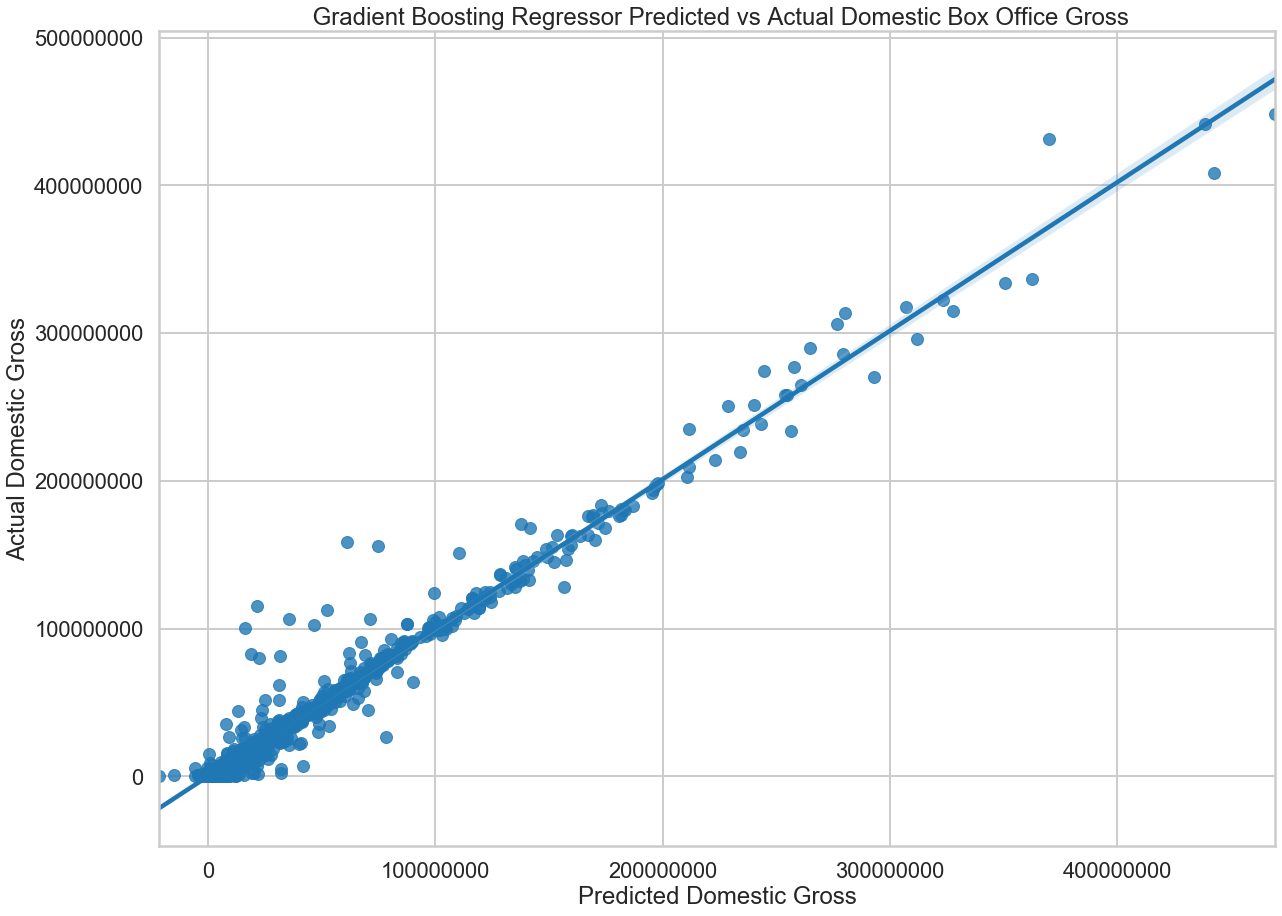

In [166]:
plt.figure(figsize=(20,15))
sns.regplot(y_pred7,y_test, fit_reg= True)
_ = plt.xlabel('Predicted Domestic Gross')
_ = plt.ylabel("Actual Domestic Gross")
_ = plt.title(" Gradient Boosting Regressor Predicted vs Actual Domestic Box Office Gross")
_ = plt.ticklabel_format(useOffset= False,style= 'plain')

In [167]:
r_square = gbr2.score(X_test, y_test)
n = len(bodf['Domestic Gross'])
k = 11
f_value = (r_square / (1 - r_square)) * ((n - k - 1) / k)
cv_scores = cross_val_score(gbr2,X_test,y_test,cv=5)
print('R^2 Training Data: {}'.format(round(gbr2.score(X_train, y_train),4)))
print('R^2 Testing Data: {}'.format(round(r_square,4)))
print('F-statistic = {}'.format(round(f_value),2))
print('Mean Test Value: {}'.format(round(y_test.mean(),2)))
print('Mean Absolute Error: {}'.format(round(metrics.mean_absolute_error(y_test, y_pred7),2)))   
print('Root Mean Squared Error: {}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred7)),2)))
print('Average 5-Fold CV Score: {}'.format(round(np.mean(cv_scores),4)))

R^2 Training Data: 0.9979
R^2 Testing Data: 0.9786
F-statistic = 50095.0
Mean Test Value: 21084331.89
Mean Absolute Error: 2103600.26
Root Mean Squared Error: 6573739.2
Average 5-Fold CV Score: 0.9377


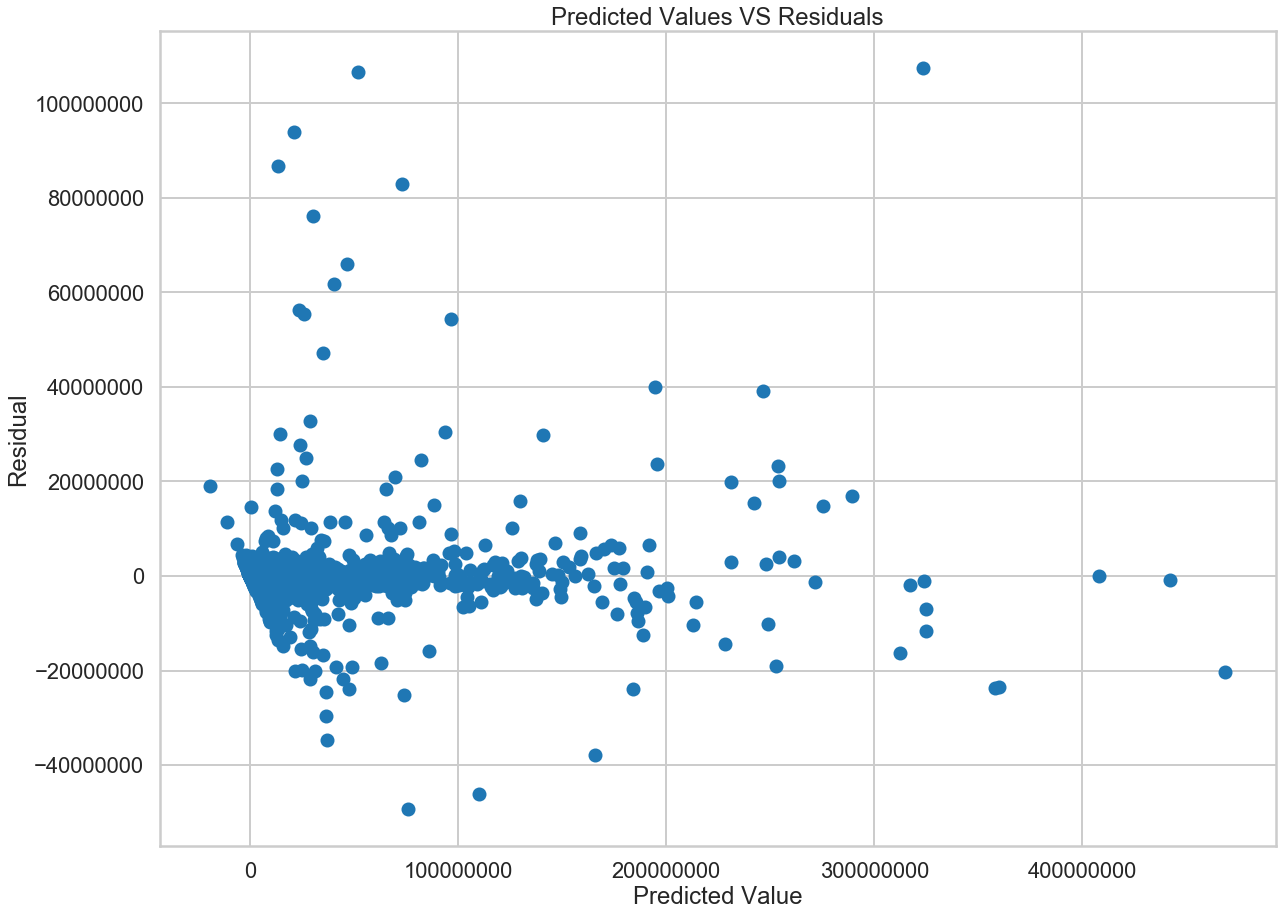

In [180]:
predicted = y_pred6
residual = y_test - predicted
_ = plt.figure(figsize=(20,15))
_ = plt.scatter(predicted,residual)
_ = plt.title('Predicted Values VS Residuals')
_ = plt.xlabel('Predicted Value')
_ = plt.ylabel('Residual')
_ = plt.ticklabel_format(useOffset= False,style= 'plain')

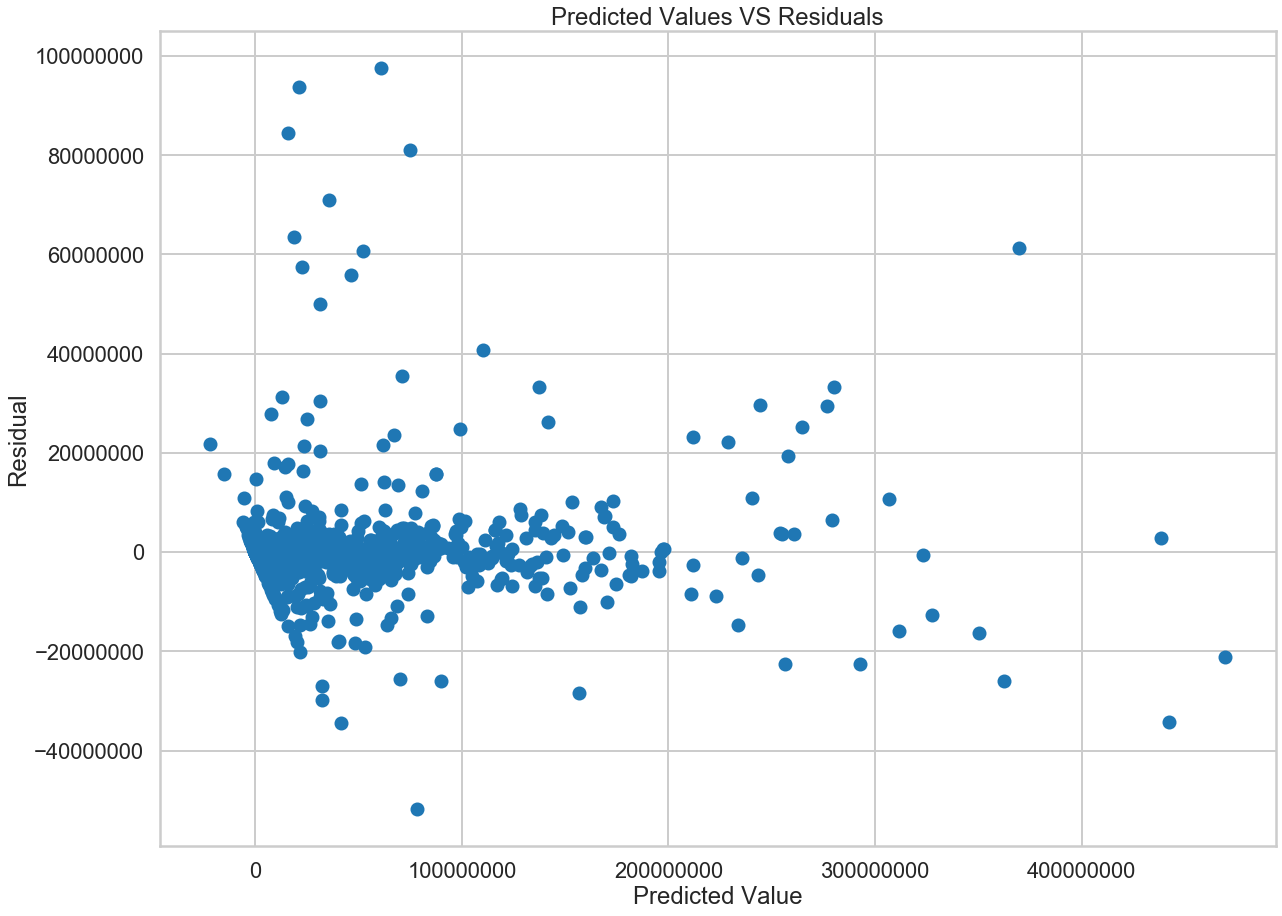

In [181]:
predicted = y_pred7
residual = y_test - predicted
_ = plt.figure(figsize=(20,15))
_ = plt.scatter(predicted,residual)
_ = plt.title('Predicted Values VS Residuals')
_ = plt.xlabel('Predicted Value')
_ = plt.ylabel('Residual')
_ = plt.ticklabel_format(useOffset= False,style= 'plain')

In [176]:
r_square = gbr1.score(X_test, y_test)
n = len(bodf['Domestic Gross'])
k = 11
f_value = (r_square / (1 - r_square)) * ((n - k - 1) / k)
cv_scores = cross_val_score(gbr1,X_test,y_test,cv=5)
print('R^2 Training Data: {}'.format(round(gbr1.score(X_train, y_train),4)))
print('R^2 Testing Data: {}'.format(round(r_square,4)))
print('F-statistic = {}'.format(round(f_value),2))
print('Mean Test Value: {}'.format(round(y_test.mean(),2)))
print('Mean Absolute Error: {}'.format(round(metrics.mean_absolute_error(y_test, y_pred6),2)))   
print('Root Mean Squared Error: {}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred6)),2)))
print('Average 5-Fold CV Score: {}'.format(round(np.mean(cv_scores),4)))

R^2 Training Data: 0.9993
R^2 Testing Data: 0.9765
F-statistic = 45519.0
Mean Test Value: 21084331.89
Mean Absolute Error: 1907810.32
Root Mean Squared Error: 6888870.75
Average 5-Fold CV Score: 0.9421


In [182]:
r_square = gbr2.score(X_test, y_test)
n = len(bodf['Domestic Gross'])
k = 11
f_value = (r_square / (1 - r_square)) * ((n - k - 1) / k)
cv_scores = cross_val_score(gbr2,X_test,y_test,cv=5)
print('R^2 Training Data: {}'.format(round(gbr2.score(X_train, y_train),4)))
print('R^2 Testing Data: {}'.format(round(r_square,4)))
print('F-statistic = {}'.format(round(f_value),2))
print('Mean Test Value: {}'.format(round(y_test.mean(),2)))
print('Mean Absolute Error: {}'.format(round(metrics.mean_absolute_error(y_test, y_pred7),2)))   
print('Root Mean Squared Error: {}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred7)),2)))
print('Average 5-Fold CV Score: {}'.format(round(np.mean(cv_scores),4)))

R^2 Training Data: 0.9979
R^2 Testing Data: 0.9786
F-statistic = 50095.0
Mean Test Value: 21084331.89
Mean Absolute Error: 2103600.26
Root Mean Squared Error: 6573739.2
Average 5-Fold CV Score: 0.9376
